In [ ]:
#installing packages required
import pandas as pd #importing pandas to create a new date frame later for predicting model
import numpy as np #numpy needed for sklearn to calculate later mathematical calculation 
from sklearn import metrics #linear regression model and for calculating confusion matrix and accuracy score
%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs

In [ ]:
df = pd.read_csv('tata_motors.csv')
#importing data

In [ ]:
#reading the data (head describes initial 5 rows date)
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,01-02-2012,182.00,185.00,178.65,183.80,181.770699,1881602,18215,342020111,460363.0,24.47,6.35,1.80
1,01-03-2012,186.05,194.60,186.05,193.90,191.325752,2444099,23307,467619079,663107.0,27.13,8.55,7.85
2,01-04-2012,193.10,202.00,193.10,200.45,198.819262,3614033,32219,718539375,933544.0,25.83,8.90,7.35
3,01-05-2012,200.80,205.60,200.15,201.55,203.171609,2954609,26866,600292664,770591.0,26.08,5.45,0.75
4,01-06-2012,199.50,204.65,198.35,203.15,201.530769,2154123,23524,434122064,544164.0,25.26,6.30,3.65


In [ ]:
#Before developing the regression model we trim the data, The ‘Date’ column will be converted to a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [ ]:
#The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns)
df.shape

(2479, 13)

In [ ]:
#checks if there are null values present or not
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [ ]:
#isna() takes a scalar or array-like object and indicates whether values are missing ( NaN in numeric arrays, None or NaN in object arrays)
#checks if there are non applicable values present or not
df.isna().any()

Date                         False
Open Price                   False
High Price                   False
Low Price                    False
Close Price                  False
WAP                          False
No.of Shares                 False
No. of Trades                False
Total Turnover (Rs.)         False
Deliverable Quantity          True
% Deli. Qty to Traded Qty     True
Spread High-Low              False
Spread Close-Open            False
dtype: bool

In [ ]:
#gives the information about the dataset and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2479 entries, 2012-01-02 to 2021-12-31
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2479 non-null   object 
 1   Open Price                 2479 non-null   float64
 2   High Price                 2479 non-null   float64
 3   Low Price                  2479 non-null   float64
 4   Close Price                2479 non-null   float64
 5   WAP                        2479 non-null   float64
 6   No.of Shares               2479 non-null   int64  
 7   No. of Trades              2479 non-null   int64  
 8   Total Turnover (Rs.)       2479 non-null   int64  
 9   Deliverable Quantity       2478 non-null   float64
 10  % Deli. Qty to Traded Qty  2478 non-null   float64
 11  Spread High-Low            2479 non-null   float64
 12  Spread Close-Open          2479 non-null   float64
dtypes: float64(9), int64(3), objec

In [ ]:
#The describe() method is used for calculating some statistical data like count of non empty values, mean, standard deviation, 
#percentile of %, min, max value of the numerical values of the Series or DataFrame.
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2479.00000,2479.000000,2479.000000,2479.000000,2479.000000,2.479000e+03,2479.000000,2.479000e+03,2.478000e+03,2478.000000,2479.000000,2479.000000
mean,329.38568,334.078035,324.023558,328.730093,329.085990,1.611268e+06,14349.918919,4.308518e+08,4.499215e+05,27.467228,10.054478,-0.655587
std,128.72824,129.848277,127.284924,128.455570,128.504187,2.815082e+06,13999.217842,1.019750e+09,2.072662e+06,13.187014,5.581517,6.976874
min,67.05000,68.000000,63.600000,65.300000,65.528024,2.892300e+04,615.000000,1.124769e+07,6.801000e+03,2.930000,0.950000,-34.950000
25%,236.05000,239.400000,230.850000,235.525000,236.042465,5.090820e+05,7384.000000,1.879874e+08,1.306568e+05,18.095000,6.200000,-4.450000
50%,325.45000,331.850000,318.700000,324.100000,325.461044,9.411860e+05,10527.000000,2.726753e+08,2.383965e+05,25.090000,8.850000,-0.900000
75%,434.20000,438.550000,428.575000,432.700000,433.040698,1.819303e+06,15870.500000,4.331772e+08,4.466125e+05,34.035000,12.450000,3.000000
max,606.00000,612.050000,595.250000,605.100000,605.255847,8.410000e+07,164374.000000,3.807770e+10,8.376508e+07,99.600000,57.100000,43.900000


In [ ]:
#Calculating the length of dataset
print(len(df))

2479


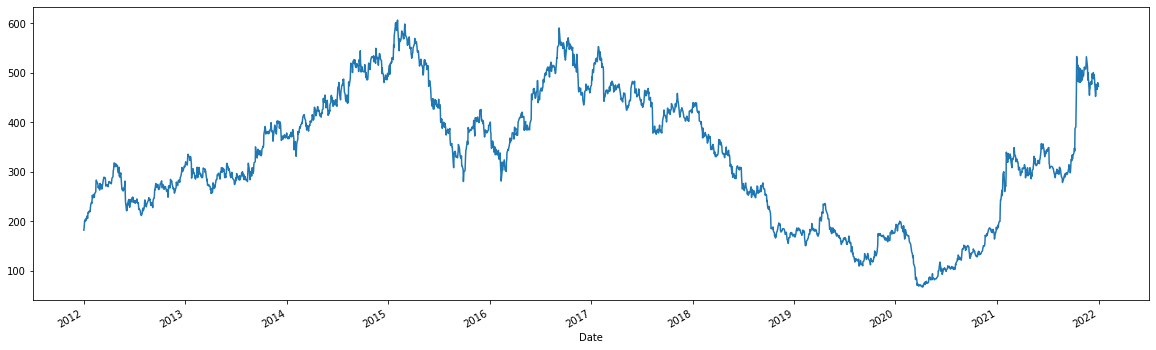

In [ ]:
#plotting the graph against close price and years
df['Open Price'].plot(figsize=(20,6))

In [ ]:
#Declare two variables since in linear regression we have dependent and independent variables
#X are the independent variables selected
#y is the dependent variable selected
X = df[['Open Price', 'High Price', 'Low Price', 'No.of Shares']]
y = df['Close Price']

Test-Train split

In [ ]:
#we split the data into testing and training model data using sklearn embedded functions
#the embedded funtion here divides the data into 75 - 25 percent 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [ ]:
#number of columns and rows of training data
X_train.shape

(1859, 4)

In [ ]:
#number of columns and rows of testing data
X_test.shape

(620, 4)

In [ ]:
#importing linear regression model, accuracy score and confusion matrix from the respective libraries
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
#With the fit model we use parameters X_train and y_train
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#The coef_ gives the coefficient of the features of the dataset.
#That is for here the first coef is for the open price and second is for high price (from X which are independent variables)so on..
print(regressor.coef_)

[-5.69902397e-01  8.46566557e-01  7.21160688e-01 -4.43967332e-08]


In [ ]:
#printing the intercept value
print(regressor.intercept_)

0.010370838772871593


In [ ]:
#Use the model to make predictions
predicted=regressor.predict(X_test)

In [ ]:
#printing the test data that we divided earlier
print(X_test)

            Open Price  High Price  Low Price  No.of Shares
Date                                                       
2013-09-30      336.00      339.55     330.60        254940
2014-10-31      526.35      537.00     521.05        447578
2016-03-21      365.65      375.20     365.65        656543
2013-10-22      379.35      385.00     376.05        675083
2013-03-13      305.60      306.00     297.35       1369948
...                ...         ...        ...           ...
2021-12-31      472.25      483.45     472.25        510974
2016-09-21      548.60      556.20     544.50        418133
2017-03-10      472.00      472.00     465.30        407708
2014-12-08      524.60      530.45     513.70        279542
2016-01-27      336.55      341.00     333.35        519337

[620 rows x 4 columns]


In [ ]:
#printing the columns of the predicted data
predicted.shape

(620,)

In [ ]:
#Creating another dataframe using pandas with parameters y_test and predicted 
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
#here we short list actual and predicted values for the new data frame which would be our predictive model
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [ ]:
#printing the new dataframe created
print(dfr)

            Actual   Predicted
Date                          
2013-09-30  332.35  334.379245
2014-10-31  535.65  530.389391
2016-03-21  374.55  372.920589
2013-10-22  379.95  380.908526
2013-03-13  300.80  299.273874
...            ...         ...
2021-12-31  482.35  480.692015
2016-09-21  549.95  550.875666
2017-03-10  468.95  466.133822
2014-12-08  515.80  520.548638
2016-01-27  337.15  337.264774

[620 rows x 2 columns]


In [ ]:
#printing the initial 25 values
dfr.head(25)

,Actual,Predicted
Date,,
2013-09-30,332.35,334.379245
2014-10-31,535.65,530.389391
2016-03-21,374.55,372.920589
2013-10-22,379.95,380.908526
2013-03-13,300.80,299.273874
2019-07-15,160.95,160.516950
2016-02-08,323.95,325.670744
2018-03-19,335.75,334.864587
2012-11-07,269.25,271.387475


In [ ]:
#importing confusion matrix and accruracy score to calculate errors
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#we calculate the score to measure the accuracy of the model against the training data
regressor.score(X_test,y_test)

0.9996229316453026

In [ ]:
#calculating errors
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.881070004597848
Mean Squared  Error: 6.3655523077401215
Root Mean Squared Error: 2.523004619048511


In [ ]:
graph=dfr.head(50) #shortlisted initial 50 values for the graphical representation from the data

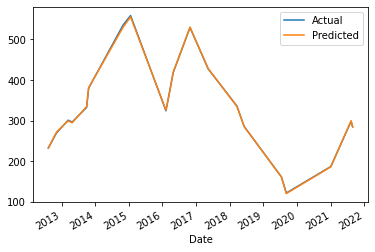

In [ ]:
graph.plot()
#plotting graphs (we see that its almost overlapping)

In [ ]:
graph=dfr.head(20) #shortlisted initial 20 values for the bar graph representation from the data

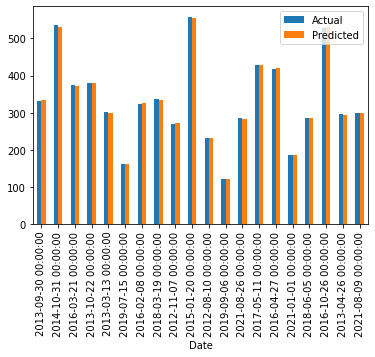

In [ ]:
graph.plot(kind='bar')
#plotting bar plot for accuracy clarity